In [52]:
#1.Take a new notebook

#2. read the data

#3. divide into train test split

#4. get params

#5.make the parameters file

#6.take GriDsearch pass the arguments

#7. fit the data

#Get below 3

#1. Best score
#2. Best estimator
#3. Get best parameters
#==============================================
#8.name it as best estimator as : best_model_tree

#9.use best estimator to predict predictions on X_test
#you will get y_test
#   y_pre=best_mode_tree.predict(X_test)

#10.now get all metrics
#precision
#recall
#accuracy
#f1 score
#roc auc

#11.compare these results with  with out hyperparameter tuning

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
df=pd.read_csv('preprocessd_data.csv')
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [55]:
X=df.drop('churn',axis=1)
y=df['churn']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree                           # base model

DecisionTreeClassifier()

In [58]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [59]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [60]:
param_grid={
    'criterion':['gini','entropy'], #2
    'max_depth': [3,4,5,6,7,8], # 6
    'min_samples_split': [2,3,4], #3
    'min_samples_leaf': [1,2,3,4], #4
    'random_state': [0,42] #2
}

In [61]:
grid_search=GridSearchCV(dtree, #base model
                        param_grid, # param
                        scoring='accuracy',# metric
                        cv=5,
                        verbose=True)

In [62]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [63]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print('Total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Total time taken is: 20.598334789276123


In [64]:
X_train.shape,y_train.shape,y_train.shape,y_test.shape

((2724, 10), (2724,), (2724,), (682,))

In [65]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 

In [66]:
grid_search.best_score_

0.8564618186724232

In [67]:
best_model_tree=grid_search.best_estimator_
best_model_tree

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [68]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [69]:
y_pred=best_model_tree.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [70]:
y_pred.shape

(682,)

In [71]:
grid_search.cv_results_

{'mean_fit_time': array([0.01094151, 0.00778351, 0.00618663, 0.01086812, 0.00651703,
        0.00618348, 0.00686941, 0.00637484, 0.00628572, 0.00639205,
        0.00639157, 0.00611382, 0.00617242, 0.00628724, 0.00639987,
        0.00738659, 0.00737333, 0.00617833, 0.00598493, 0.00658312,
        0.00720487, 0.00735931, 0.00637436, 0.00667992, 0.01545429,
        0.00857744, 0.00792251, 0.00738921, 0.00831108, 0.00857878,
        0.0077127 , 0.00804501, 0.01016345, 0.01336455, 0.0133431 ,
        0.01126194, 0.01107969, 0.01048989, 0.00857053, 0.01029263,
        0.00798168, 0.01238041, 0.01363983, 0.01898026, 0.01815696,
        0.01037393, 0.01027255, 0.0086709 , 0.01277461, 0.01197424,
        0.00944538, 0.01008143, 0.00940127, 0.00949569, 0.01097603,
        0.009583  , 0.0093153 , 0.00977073, 0.00950241, 0.01049685,
        0.00916958, 0.0093102 , 0.00937881, 0.00947585, 0.00978699,
        0.00876536, 0.00969052, 0.00977559, 0.0099    , 0.00877886,
        0.01009364, 0.00878663,

In [75]:
c1=grid_search.cv_results_['split0_test_score']
c2=grid_search.cv_results_['split1_test_score']
c3=grid_search.cv_results_['split2_test_score']
c4=grid_search.cv_results_['split3_test_score']
c5=grid_search.cv_results_['split4_test_score']
mean_score=grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(zip(c1,c2,c3,c4,c5,mean_score),
                columns=['CV1','CV2','CV3','CV4','CV5','Mean_test_score'],
                index=grid_search.cv_results_['params'])
df

,CV1,CV2,CV3,CV4,CV5,Mean_test_score
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}",0.807339,0.829358,0.842202,0.818349,0.821691,0.823788
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}",0.807339,0.829358,0.842202,0.818349,0.821691,0.823788
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}",0.807339,0.829358,0.842202,0.818349,0.821691,0.823788
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}",0.807339,0.829358,0.842202,0.818349,0.821691,0.823788
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}",0.807339,0.829358,0.842202,0.818349,0.821691,0.823788
...,...,...,...,...,...,...
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}",0.844037,0.836697,0.882569,0.866055,0.851103,0.856092
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 0}",0.842202,0.836697,0.880734,0.864220,0.858456,0.856462
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 42}",0.844037,0.836697,0.882569,0.866055,0.851103,0.856092
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4, 'random_state': 0}",0.842202,0.836697,0.880734,0.864220,0.858456,0.856462


In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc
dtree_acc=round(accuracy_score(y_test,y_pred),2)
dtree_pr=round(precision_score(y_test,y_pred),2)
dtree_rc=round(recall_score(y_test,y_pred),2)
dtree_f1=round(f1_score(y_test,y_pred),2)

print('Precision is:',dtree_pr)
print('Recall is:',dtree_rc)
print('Accuracy is:',dtree_acc)
print('F1_Score is:',dtree_f1)

Precision is: 0.88
Recall is: 0.83
Accuracy is: 0.87
F1_Score is: 0.86


In [77]:
y_predict_prob=best_model_tree.predict_proba(X_test)

y_predict_prob_yes=y_predict_prob[:,1] # all the rows from one column
y_predict_prob_yes

array([0.        , 0.84251969, 1.        , 0.        , 0.        ,
       0.        , 0.25      , 0.08139535, 1.        , 0.84251969,
       0.97402597, 0.3372093 , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.83908046, 0.        , 1.        ,
       0.3372093 , 0.        , 0.        , 0.95833333, 1.        ,
       1.        , 0.00884956, 1.        , 0.        , 0.97402597,
       1.        , 1.        , 0.        , 1.        , 0.42857143,
       0.33707865, 0.08139535, 0.84251969, 0.3372093 , 0.05970149,
       0.3372093 , 0.16666667, 0.83908046, 0.        , 1.        ,
       0.84251969, 0.        , 0.        , 0.3372093 , 0.        ,
       0.82857143, 1.        , 0.42857143, 0.3372093 , 0.6       ,
       0.42857143, 0.00884956, 0.3372093 , 0.27906977, 0.        ,
       0.84251969, 1.        , 0.82857143, 0.05970149, 0.16666667,
       0.        , 1.        , 1.        , 0.        , 0.33720

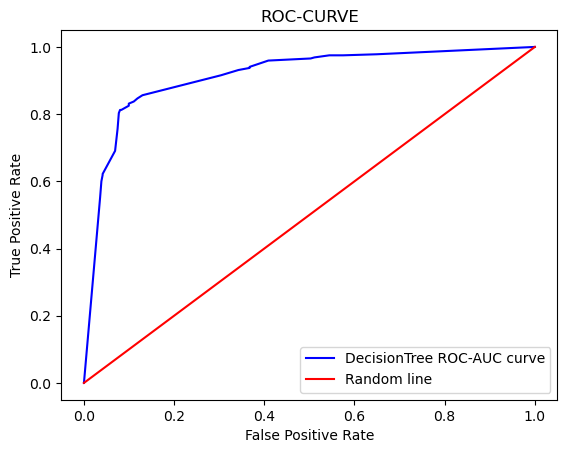

In [78]:
import matplotlib.pyplot as plt
fpr,tpr,threshoulds=roc_curve(y_test,y_predict_prob_yes)
plt.plot(fpr,tpr,color='blue',label='DecisionTree ROC-AUC curve')
plt.plot([0,1],[0,1],color='red',label='Random line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-CURVE')
plt.legend()